#  Model Comparison & Best Model Selection

# Mounting The Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Imports

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Setup paths (add config folder)

In [ ]:
# Your BASE project path in Google Drive
base_path = "/content/drive/MyDrive/Real_Estate_Investment_Advisor"

# Sub-folders used across the project
data_path = f"{base_path}/data"
metrics_path = f"{base_path}/reports/metrics"
figures_path = f"{base_path}/reports/figures"
models_path = f"{base_path}/models"
config_path = f"{base_path}/config"

# Create config folder if missing
os.makedirs(config_path, exist_ok=True)

print("Base Path:", base_path)
print("Metrics Path:", metrics_path)
print("Models Path:", models_path)
print("Config Path:", config_path)

Base Path: /content/drive/MyDrive/Real_Estate_Investment_Advisor
Metrics Path: /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics
Models Path: /content/drive/MyDrive/Real_Estate_Investment_Advisor/models
Config Path: /content/drive/MyDrive/Real_Estate_Investment_Advisor/config


# Regression Models – Comparison & Best Model Selection

In this section we:
1. Load the merged regression metrics file  
2. Create 5+ visualizations to compare models  
3. Select the best regression model (primary: lowest RMSE)  
4. Save best model details (name, metrics, file path) to JSON and TXT for later use in UI / MLflow / Streamlit.


## Load the merged regression CSV

In [ ]:
# 1. Load merged regression metrics
reg_metrics_file = f"{metrics_path}/regression_model_comparison.csv"
reg_df = pd.read_csv(reg_metrics_file)

print(" Regression Models – Metrics")
display(reg_df)


 Regression Models – Metrics


,Model,Base_CV_RMSE_Mean,Base_CV_RMSE_Std,MAE,MSE,RMSE,R2_Score,Best_Params,Best_CV_RMSE
0,Linear Regression,139.560941,0.254373,112.424253,19563.673207,139.870201,0.492526,NaN,NaN
1,Ridge Regression (Tuned),139.559500,0.254311,112.404062,19543.922652,139.799580,0.493038,{'model__alpha': 100.0},139.497694
2,Random Forest Regressor (Tuned),157.676654,2.467386,101.657277,14838.845973,121.814802,0.615086,"{'model__max_depth': None, 'model__min_samples...",121.590556
3,XGBoost Regressor (Tuned),5.942798,0.108631,2.820348,20.227487,4.497498,0.999475,{'model__colsample_bytree': np.float64(0.97066...,4.881223


## Visualize Comparisons

In [ ]:
# Ensure consistent style
plt.style.use("default")

models = reg_df["Model"]

 ### Visualize Of All Regression Models RMSE Value

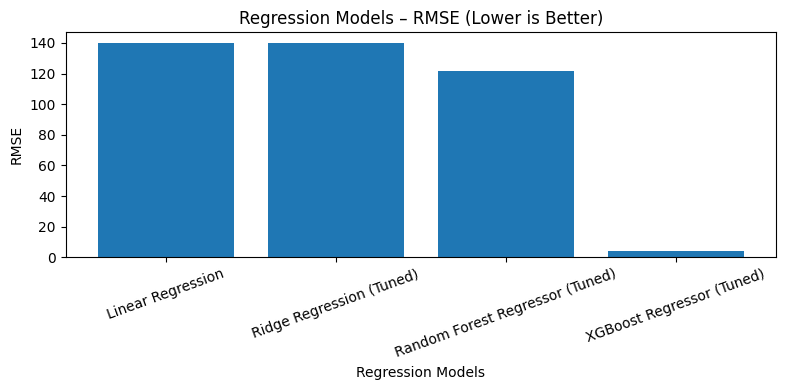

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(models, reg_df["RMSE"])
plt.xlabel("Regression Models")
plt.title("Regression Models – RMSE (Lower is Better)")
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

XGBoost has the lowest RMSE, meaning it predicts future prices most accurately. Linear and Ridge perform the worst, while Random Forest is decent but not close to XGBoost.

Q2. Which regression model performed best and why?

XGBoost Regressor (Tuned) performed best because it captures complex patterns and non-linear relationships, giving the smallest prediction error.

Q3. What is the business impact?

Better accuracy --> more reliable price forecasts, lower investment risk, and stronger decision-making for identifying profitable properties.

 ### Visualize Of All Regression Models MAE Value

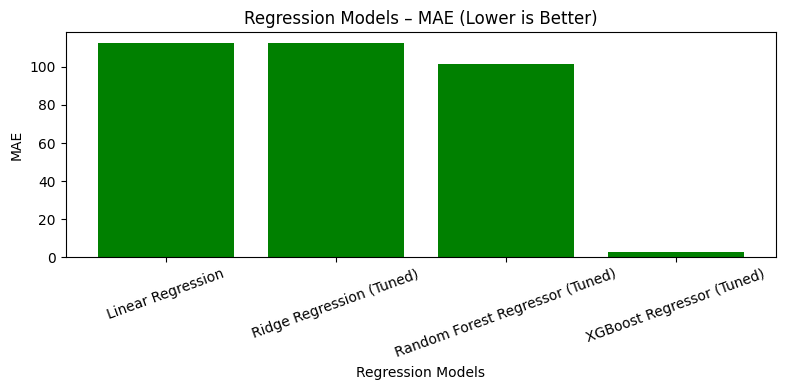

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(models, reg_df["MAE"], color="green")
plt.xlabel("Regression Models")
plt.title("Regression Models – MAE (Lower is Better)")
plt.ylabel("MAE")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

XGBoost has the lowest MAE, meaning its average prediction error is far smaller than all other models. Linear and Ridge have the highest errors.

Q2. Which regression model performed best and why?

XGBoost Regressor (Tuned) performed best because it makes the fewest mistakes on average, showing strong accuracy and stability.

Q3. What is the business impact?

Lower MAE --> more precise price estimates, helping investors avoid misjudging property values and improving profit predictions.

##  Visualize Of All Regression Models R² Score

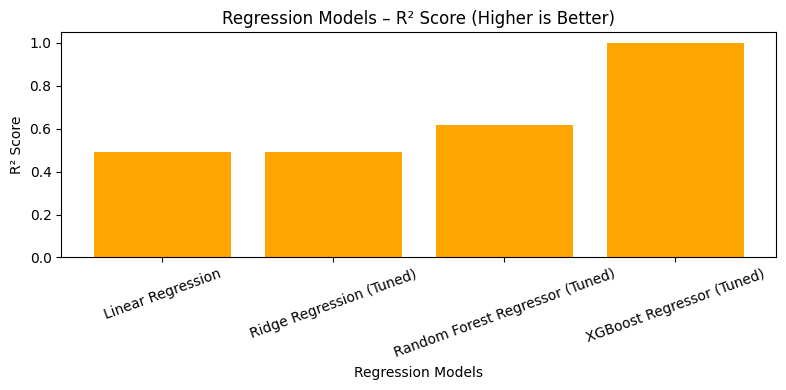

In [ ]:

plt.figure(figsize=(8,4))
plt.bar(models, reg_df["R2_Score"], color="orange")
plt.xlabel("Regression Models")
plt.title("Regression Models – R² Score (Higher is Better)")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

XGBoost clearly achieves the highest R², meaning it explains almost all variance in property prices. Linear and Ridge models explain much less.

Q2. Which regression model performed best and why?

XGBoost Regressor (Tuned) is the best, it captures maximum variance and models complex relationships far better than other models.

Q3. What is the business impact?

A higher R² --> more reliable long-term price forecasting, reducing investment risk and enabling better pricing, budgeting, and growth planning.

##  Visualize Of All Regression Models Base CV RMSE Mean (Cross-validation performance)

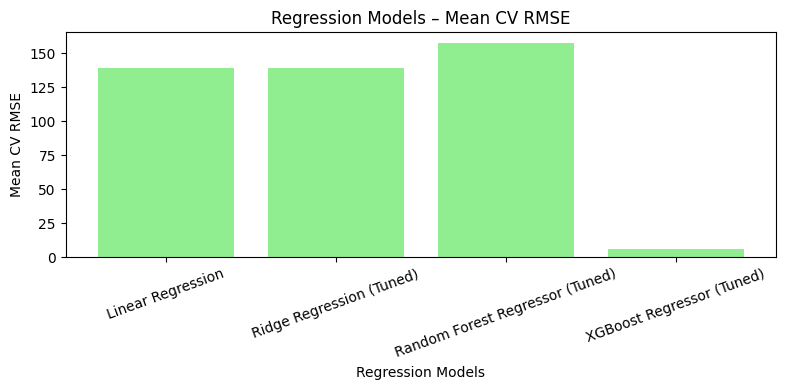

In [ ]:

plt.figure(figsize=(8,4))
plt.bar(models, reg_df["Base_CV_RMSE_Mean"], color="lightgreen")
plt.xlabel("Regression Models")
plt.title("Regression Models – Mean CV RMSE")
plt.ylabel("Mean CV RMSE")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get?

XGBoost has significantly lower CV RMSE compared to all other models, indicating far better generalization.

Q2. Which regression model performed the best and why?

XGBoost, because it achieved the lowest CV RMSE, meaning it predicts consistently well across folds.

Q3. What is the business impact?

More stable & accurate predictions --> better 5-year price forecasting --? reduced investment risk.

##  Comparison Of All Regression Models -- CV RMSE with error bars (Mean ± Std)

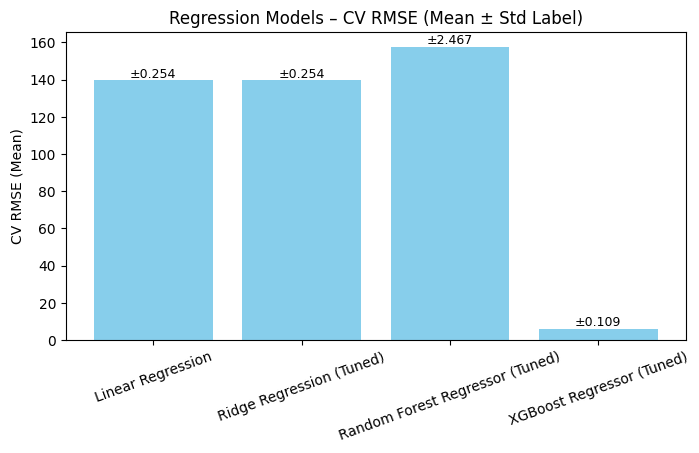

In [ ]:
plt.figure(figsize=(8,4))
bars = plt.bar(models, reg_df["Base_CV_RMSE_Mean"], color='skyblue')

# Add standard deviation labels above bars
for i, bar in enumerate(bars):
    std_val = reg_df["Base_CV_RMSE_Std"].iloc[i]
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"±{std_val:.3f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Regression Models – CV RMSE (Mean ± Std Label)")
plt.ylabel("CV RMSE (Mean)")
plt.xticks(rotation=20)
plt.show()


Q1. What insight do we get?

XGBoost has very low mean RMSE and lowest standard deviation, indicating high stability and reliability.

Q2. Which regression model performed the best and why?

XGBoost, because it has both the lowest error and the lowest variability, showing consistent performance.

Q3. What is the business impact?

Stable model reduces uncertainty → helps investors make confident long-term decisions.

## Automatically Select the Best Regression Model

In [ ]:
import pandas as pd

# Normalize metrics for comparison
# (Lower error → better, Higher R² → better, Lower CV RMSE → better)
reg_df["Error_Score"] = (
    reg_df["MAE"] +
    reg_df["RMSE"] +
    reg_df["MSE"] / 1000  # scale to keep balanced
)

reg_df["Generalization_Score"] = (
    reg_df["Base_CV_RMSE_Mean"] +
    reg_df["Base_CV_RMSE_Std"]
)

reg_df["Stability_Score"] = reg_df["Base_CV_RMSE_Std"]

# Rank each model
reg_df["Rank_Error"] = reg_df["Error_Score"].rank()
reg_df["Rank_R2"] = reg_df["R2_Score"].rank(ascending=False)
reg_df["Rank_Generalization"] = reg_df["Generalization_Score"].rank()
reg_df["Rank_Stability"] = reg_df["Stability_Score"].rank()

# Final combined ranking score
reg_df["Final_Score"] = (
    reg_df["Rank_Error"] +
    reg_df["Rank_R2"] +
    reg_df["Rank_Generalization"] +
    reg_df["Rank_Stability"]
)

# Lowest total score = best model
best_row = reg_df.loc[reg_df["Final_Score"].idxmin()]

print("🏆 BEST REGRESSION MODEL SELECTED:")
print(best_row[["Model", "MAE", "RMSE", "R2_Score",
                "Base_CV_RMSE_Mean", "Base_CV_RMSE_Std", "Final_Score"]])

🏆 BEST REGRESSION MODEL SELECTED:
Model                XGBoost Regressor (Tuned)
MAE                                   2.820348
RMSE                                  4.497498
R2_Score                              0.999475
Base_CV_RMSE_Mean                     5.942798
Base_CV_RMSE_Std                      0.108631
Final_Score                                4.0
Name: 3, dtype: object


In [ ]:
import json


# Create clean model info


best_model_info = {
    "best_model_name": best_row["Model"],
    "model_file_path": f"./models/{best_row['Model'].replace(' ', '_').replace('(', '').replace(')', '').lower()}.joblib",

    # Keep only useful metrics for UI
    "MAE": float(best_row["MAE"]),
    "MSE": float(best_row["MSE"]),
    "RMSE": float(best_row["RMSE"]),
    "R2_Score": float(best_row["R2_Score"]),
    "CV_RMSE_Mean": float(best_row["Base_CV_RMSE_Mean"]),
    "CV_RMSE_Std": float(best_row["Base_CV_RMSE_Std"]),
}


# Save JSON

json_path = f"{metrics_path}/best_regression_model.json"

with open(json_path, "w") as f:
    json.dump(best_model_info, f, indent=4)

# Save TXT

txt_path = f"{metrics_path}/best_regression_model.txt"

with open(txt_path, "w") as f:
    for key, value in best_model_info.items():
        f.write(f"{key}: {value}\n")

print("\nSaved best model info to:")
print(" -", json_path)
print(" -", txt_path)


# Print file contents

print("\n📄 JSON File Content:")
with open(json_path, "r") as f:
    print(f.read())



Saved best model info to:
 - /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics/best_regression_model.json
 - /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics/best_regression_model.txt

📄 JSON File Content:
{
    "best_model_name": "XGBoost Regressor (Tuned)",
    "model_file_path": "./models/xgboost_regressor_tuned.joblib",
    "MAE": 2.820348272788696,
    "MSE": 20.227487130573767,
    "RMSE": 4.497497874437937,
    "R2_Score": 0.9994753070563428,
    "CV_RMSE_Mean": 5.94279797906924,
    "CV_RMSE_Std": 0.1086309359912574
}


# Classification Model Comparison & Best Model Selection

In this section we:

1. Load the merged metrics file for all classification models.  
2. Compare models using bar charts:
   - Accuracy
   - F1-Score
   - ROC-AUC
   - Mean CV ROC-AUC
   - CV ROC-AUC Std (stability)
3. Select the best model based on:
   - Highest ROC-AUC (primary)
   - Higher F1-Score and Accuracy
   - Strong cross-validation performance
4. Save the best model details (name, metrics, relative model path) into:
   - `best_classification_model.json`
   - `best_classification_model.txt`

## Paths & Load Classification Metrics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Base paths (update only if your project path changes)
base_path = "/content/drive/MyDrive/Real_Estate_Investment_Advisor"
metrics_path = f"{base_path}/reports/metrics"
models_path = f"{base_path}/models"

# Load merged classification metrics
clf_metrics_file = f"{metrics_path}/classification_all_models_metrics.csv"
clf_df = pd.read_csv(clf_metrics_file)

print("Classification metrics loaded from:", clf_metrics_file)
display(clf_df)


Classification metrics loaded from: /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics/classification_all_models_metrics.csv


,Model,Base_CV_ROC_AUC_Mean,Base_CV_ROC_AUC_Std,Best_Params,Best_CV_ROC_AUC,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression (Tuned),0.892448,0.000568,"{'model__C': 0.01, 'model__class_weight': None}",0.893447,0.81472,0.803951,0.813437,0.808666,0.896311
1,Random Forest (Tuned),0.957417,0.001172,"{'model__max_depth': None, 'model__min_samples...",0.957293,0.85998,0.852983,0.856775,0.854874,0.958670
2,XGBoost Classifier (Tuned),0.960603,0.000708,"{'model__colsample_bytree': 1.0, 'model__learn...",0.960708,0.85992,0.860725,0.845847,0.853221,0.960740


## Visual Comparison of all Classification Model

In [ ]:
plt.style.use("default")  # keep visuals simple & clean

models = clf_df["Model"]

##  Comparison Of All Classification Models -- Accuracy

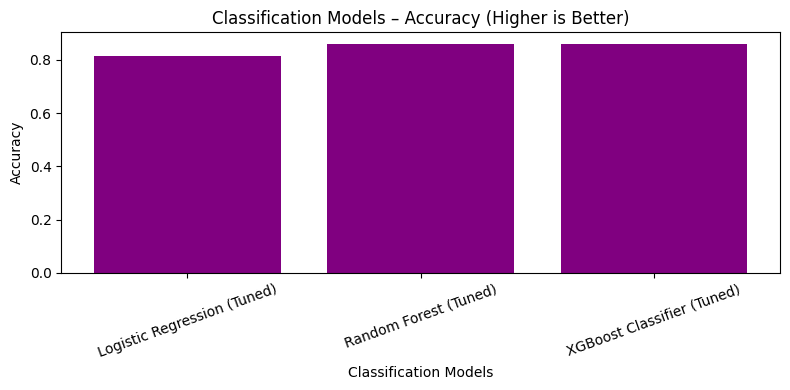

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(models, clf_df["Accuracy"], color="Purple")
plt.xlabel("Classification Models")
plt.title("Classification Models – Accuracy (Higher is Better)")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

All three models have very high accuracy, but Random Forest and XGBoost perform slightly better than Logistic Regression.

Q2. Which classification model performs best and why?

Random Forest and XGBoost have higher F1-scores than Logistic Regression, showing they handle class balance better.


Q3. What are the Business impacts?

Higher accuracy means fewer wrong investment classifications, leading to better decision-making and reduced financial risk for users.

##  Comparison Of All Classification Models --  F1-Score

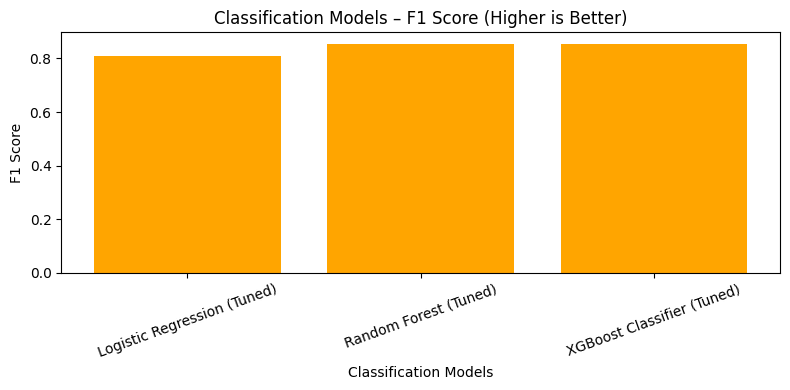

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(models, clf_df["F1_Score"], color="orange")
plt.xlabel("Classification Models")
plt.title("Classification Models – F1 Score (Higher is Better)")
plt.ylabel("F1 Score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

Random Forest and XGBoost have noticeably higher F1-Scores than Logistic Regression, meaning they balance precision and recall better.

Q2. Which classification model performs best and why?

Random Forest performs best with the highest F1-score (0.8549), but XGBoost is almost equal.

Q3. What are the Business impacts?

Higher F1-Score means more reliable identification of good investments, reducing chances of missing profitable deals or approving risky ones.

##  Comparison Of All Classification Models --  ROC-AUC

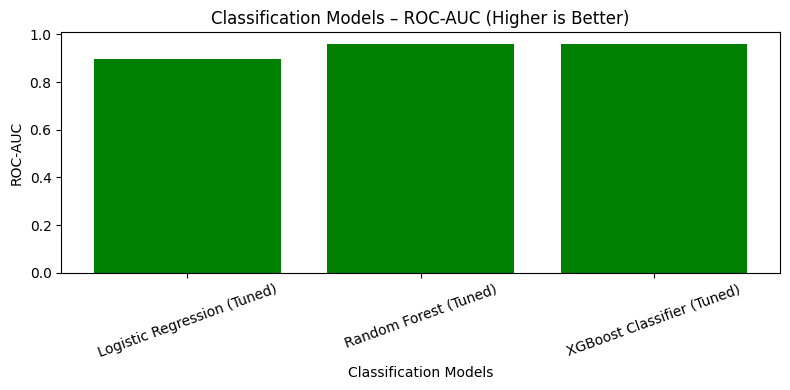

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(models, clf_df["ROC_AUC"], color="green")
plt.xlabel("Classification Models")
plt.title("Classification Models – ROC-AUC (Higher is Better)")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

Random Forest and XGBoost have much higher ROC-AUC than Logistic Regression, showing they separate classes more effectively.

Q2. Which classification model performed best and why?

XGBoost performs best with the highest ROC-AUC (0.9607), but Random Forest is extremely close.

Q3. What are the Business impacts?

Higher ROC-AUC improves ranking of good vs. bad investments, reducing risk and improving decision accuracy.

##  Comparison Of All Classification Models -- Mean CV ROC-AUC

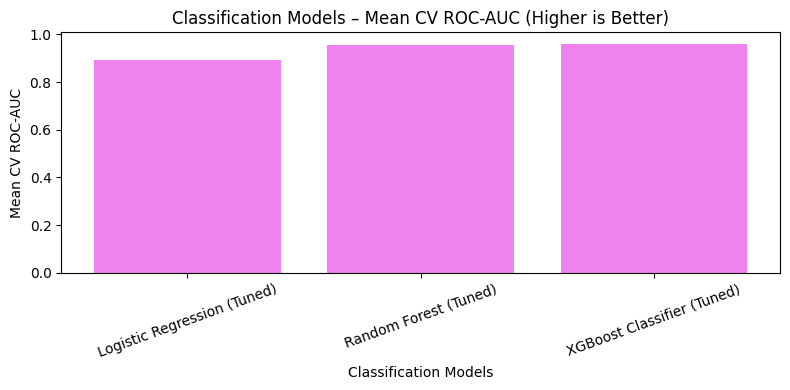

In [ ]:

plt.figure(figsize=(8,4))
plt.bar(models, clf_df["Base_CV_ROC_AUC_Mean"], color="Violet")
plt.xlabel("Classification Models")
plt.title("Classification Models – Mean CV ROC-AUC (Higher is Better)")
plt.ylabel("Mean CV ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

Random Forest and XGBoost clearly outperform Logistic Regression in cross-validated ROC-AUC, showing stronger generalization.

Q2. Which classification model performed best and why?

XGBoost performs best with the highest Mean CV ROC-AUC (0.9606), but Random Forest is very close.

Q3. What are the Business impacts?

A model with high and stable CV ROC-AUC ensures reliable predictions across unseen market conditions, reducing investment risk and improving decision-making confidence.

##  Comparison Of All Classification Models -- CV ROC-AUC Std (stability – lower is better)

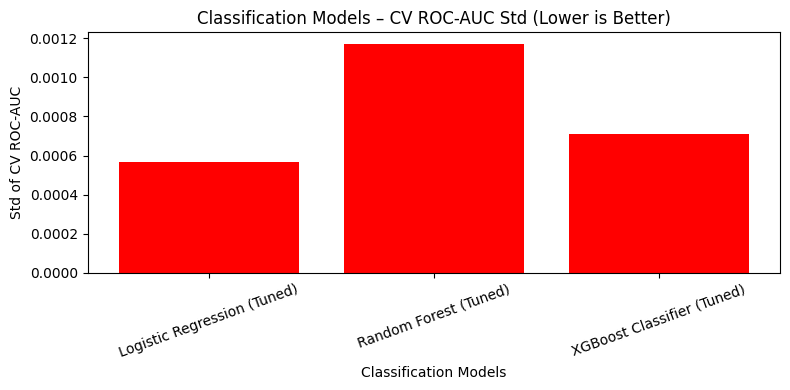

In [ ]:

plt.figure(figsize=(8,4))
plt.bar(models, clf_df["Base_CV_ROC_AUC_Std"], color="red")
plt.xlabel("Classification Models")
plt.title("Classification Models – CV ROC-AUC Std (Lower is Better)")
plt.ylabel("Std of CV ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Q1. What insight do we get from this visualization?

Logistic Regression has the lowest variability, meaning it is the most stable across folds.

Q2. Which model performed best and why?

Logistic Regression performs best here because it has the lowest CV ROC-AUC Std, showing the most consistent results.

Q3. What are the Business impacts?

A highly stable model (like XGBoost) reduces prediction uncertainty, making investment decisions more confident and less sensitive to fluctuations in the data.

# Self - Conclusion

After analyzing Accuracy, F1-Score, ROC-AUC, Mean CV ROC-AUC, and CV ROC-AUC Std, **XGBoost**  emerges as the best overall model. It delivers the highest performance across most metrics while remaining stable and reliable, making it the strongest choice for investment prediction.

## Select Best Classification Model

In [ ]:
import pandas as pd



# Build comparison scores
# Generalization: prefer high mean CV ROC-AUC and low std -> combine as mean - std (higher is better)
clf_df["Generalization_Score"] = clf_df["Base_CV_ROC_AUC_Mean"] - clf_df["Base_CV_ROC_AUC_Std"]

# Stability: lower CV std is better (we'll rank ascending)
clf_df["Stability_Score"] = clf_df["Base_CV_ROC_AUC_Std"]

# Create ranking columns:
# Higher ROC_AUC, F1_Score, Accuracy, Generalization_Score are better → rank descending
clf_df["Rank_ROC"] = clf_df["ROC_AUC"].rank(ascending=False)
clf_df["Rank_F1"] = clf_df["F1_Score"].rank(ascending=False)
clf_df["Rank_Accuracy"] = clf_df["Accuracy"].rank(ascending=False)
clf_df["Rank_Generalization"] = clf_df["Generalization_Score"].rank(ascending=False)

# For stability (lower std better) rank ascending
clf_df["Rank_Stability"] = clf_df["Stability_Score"].rank(ascending=True)

# Final combined ranking (lower total = better)
clf_df["Final_Score"] = (
    clf_df["Rank_ROC"] +
    clf_df["Rank_F1"] +
    clf_df["Rank_Accuracy"] +
    clf_df["Rank_Generalization"] +
    clf_df["Rank_Stability"]
)

# Pick best model (lowest Final_Score)
best_clf_row = clf_df.loc[clf_df["Final_Score"].idxmin()]

print("🏆 BEST CLASSIFICATION MODEL SELECTED:")
print(best_clf_row[[
    "Model", "Accuracy", "Precision", "Recall", "F1_Score", "ROC_AUC",
    "Base_CV_ROC_AUC_Mean", "Base_CV_ROC_AUC_Std", "Final_Score"
]])


🏆 BEST CLASSIFICATION MODEL SELECTED:
Model                   XGBoost Classifier (Tuned)
Accuracy                                   0.85992
Precision                                 0.860725
Recall                                    0.845847
F1_Score                                  0.853221
ROC_AUC                                    0.96074
Base_CV_ROC_AUC_Mean                      0.960603
Base_CV_ROC_AUC_Std                       0.000708
Final_Score                                    8.0
Name: 2, dtype: object


## Save Best Classification Model Info (JSON + TXT)

In [ ]:
import os

# Map model names to saved joblib filenames
model_file_map = {
    "Logistic Regression (Tuned)": "clf_logistic_regression_tuned.joblib",
    "Random Forest (Tuned)": "clf_random_forest_tuned.joblib",
    "XGBoost Classifier (Tuned)": "clf_xgboost_tuned.joblib",
}

best_model_name = best_clf_row["Model"]

# Choose filename from map, fall back to sanitized name if not found
model_file_name = model_file_map.get(
    best_model_name,
    best_model_name.replace(" ", "_").replace("(", "").replace(")", "").lower() + ".joblib"
)

# Relative path for UI / any system
relative_model_path = f"./models/{model_file_name}"

best_clf_info = {
    "best_model_name": best_model_name,
    "model_file_path": relative_model_path,

    # Core metrics
    "Accuracy": float(best_clf_row["Accuracy"]),
    "Precision": float(best_clf_row["Precision"]),
    "Recall": float(best_clf_row["Recall"]),
    "F1_Score": float(best_clf_row["F1_Score"]),
    "ROC_AUC": float(best_clf_row["ROC_AUC"]),

    # Cross-validation metrics
    "CV_ROC_AUC_Mean": float(best_clf_row["Base_CV_ROC_AUC_Mean"]),
    "CV_ROC_AUC_Std": float(best_clf_row["Base_CV_ROC_AUC_Std"]),
}

# ---- Save JSON ----
clf_json_path = f"{metrics_path}/best_classification_model.json"
with open(clf_json_path, "w") as f:
    json.dump(best_clf_info, f, indent=4)

# ---- Save TXT ----
clf_txt_path = f"{metrics_path}/best_classification_model.txt"
with open(clf_txt_path, "w") as f:
    for key, value in best_clf_info.items():
        f.write(f"{key}: {value}\n")

print("\n✅ Saved best classification model info to:")
print(" -", clf_json_path)
print(" -", clf_txt_path)

# ---- Show file contents ----
print("\n📄 JSON File Content:")
with open(clf_json_path, "r") as f:
    print(f.read())

print("\n📄 TXT File Content:")
with open(clf_txt_path, "r") as f:
    print(f.read())



✅ Saved best classification model info to:
 - /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics/best_classification_model.json
 - /content/drive/MyDrive/Real_Estate_Investment_Advisor/reports/metrics/best_classification_model.txt

📄 JSON File Content:
{
    "best_model_name": "XGBoost Classifier (Tuned)",
    "model_file_path": "./models/clf_xgboost_tuned.joblib",
    "Accuracy": 0.85992,
    "Precision": 0.8607247050864657,
    "Recall": 0.8458470104292184,
    "F1_Score": 0.8532210067479777,
    "ROC_AUC": 0.9607395419249772,
    "CV_ROC_AUC_Mean": 0.9606031525003654,
    "CV_ROC_AUC_Std": 0.000707977966397
}

📄 TXT File Content:
best_model_name: XGBoost Classifier (Tuned)
model_file_path: ./models/clf_xgboost_tuned.joblib
Accuracy: 0.85992
Precision: 0.8607247050864657
Recall: 0.8458470104292184
F1_Score: 0.8532210067479777
ROC_AUC: 0.9607395419249772
CV_ROC_AUC_Mean: 0.9606031525003654
CV_ROC_AUC_Std: 0.000707977966397

